# Project 2 - Classification

<h5 style="font-size: 1.3em;color: #69956e;"> Predict customers likely to respond to a marketing campaign</h5>
<p>This notebook uses the <em>campaign.xlsx</em> dataset.</p>

<strong>Machine Learning for Marketing 2023/2024</strong>

<strong>Professors:</strong>
- Nuno António
- Ana Edmundo
- Hugo Silva
- Vasco Jesus

<strong>Projet developed by:</strong>
- Anabela Florência, r20201584
- António Cadaixa, r20201505
- Constança Rodrigues, r20201586
- Joana Pimenta, r20201590
- Laura Freitas, 20230172
<br>

<h5 style="font-size: 1.3em; color: #69956e;">Work Description</h5>

<p style="color: #000000;"> This document aims to further explore the needs of the Marketing Department of a retail company for predicting which customers are likely to respond to a marketing campaing based on information from a previous campaign. A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses.</p>

# Initializations and Data Loading

In [1]:
# Load packages
import os
import random
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import pointbiserialr
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, StandardScaler
from imblearn.over_sampling import SMOTE
import collections 
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn import metrics
from sklearn import tree
from sklearn import linear_model
from sklearn.preprocessing import SplineTransformer
from sklearn.impute import KNNImputer
from feature_engine.creation import CyclicalFeatures
from yellowbrick.model_selection import RFECV, LearningCurve
from yellowbrick.regressor import ResidualsPlot, PredictionError
 # Ensure this line is not indented beyond the expected level
get_ipython().system('pip install category_encoders')
import category_encoders as ce
import pickle
# import graphviz
!pip install graphviz
from numpy.polynomial.polynomial import Polynomial
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ROCAUC
warnings.filterwarnings('ignore')

# To plot in notebook
%matplotlib inline

In [2]:
# Load the dataset 
ds = pd.read_excel('campaign_prepared.xlsx') 

# Data Understanding

In [3]:
# Display the top 10 rows - provides an overview of the varibles and facilitates data understanding
ds.head(10)

,ID,Education,Marital_Status,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,...,MntGoldProds_log,Age,MntFood_log,Total_Children,Total_Campaigns,Engagement_Score,AOV,R_score,RFM_Score,RFM_Label
0,0,Graduation,Married,1,0,0,0,0,0,0,...,4.007333,39,18.735464,0,0,0.285714,1.660202,2,10,Big Spenders
1,1,Graduation,Single,1,0,0,0,0,1,0,...,3.637586,63,8.738735,0,1,1.142857,1.028798,5,12,Recent Customers
2,9,Master,Single,4,0,0,0,0,0,0,...,3.610918,49,5.411646,2,0,1.714286,1.189364,1,5,At Risk
3,13,PhD,Widow,2,0,0,0,0,0,0,...,2.197225,77,3.871201,1,0,1.142857,1.510693,3,5,Other
4,17,PhD,Married,4,0,0,0,0,0,0,...,4.343805,53,14.904153,1,0,1.285714,0.952085,1,10,Frequent Customers
5,20,2n Cycle,Married,1,0,0,0,0,0,0,...,4.127134,59,11.916789,1,0,0.714286,2.478514,1,6,Other
6,22,Graduation,Divorced,2,0,0,0,0,0,0,...,2.708050,48,10.151597,1,0,1.428571,1.291814,1,7,Other
7,24,Master,Together,5,0,0,0,0,0,0,...,1.945910,64,5.886104,2,0,1.714286,0.898038,1,5,Other
8,25,Graduation,Married,2,0,0,0,0,0,0,...,5.036953,66,15.722201,1,0,0.857143,1.280598,5,13,Loyal Customers
9,35,Graduation,Married,3,0,0,0,0,0,0,...,4.454347,37,10.265697,1,0,1.428571,1.821655,4,9,Emerging Customers


In [4]:
# More detailed information about the DataFrame and the variables
# Helps understanding the existing types of data and the amount of non-null entries of each variable

def basic_info(ds):
    print("This dataset has ", ds.shape[1], " columns and ", ds.shape[0], " rows.")
    print("This dataset has ", ds[ds.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(ds.info())
basic_info(ds)

This dataset has  22  columns and  2230  rows.
This dataset has  0  duplicated rows.
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2230 non-null   int64  
 1   Education          2230 non-null   object 
 2   Marital_Status     2230 non-null   object 
 3   NumDealsPurchases  2230 non-null   int64  
 4   AcceptedCmp3       2230 non-null   int64  
 5   AcceptedCmp4       2230 non-null   int64  
 6   AcceptedCmp5       2230 non-null   int64  
 7   AcceptedCmp1       2230 non-null   int64  
 8   AcceptedCmp2       2230 non-null   int64  
 9   Complain           2230 non-null   int64  
 10  Response           2230 non-null   int64  
 11  MntWines_log       2230 non-null   float64
 12  MntGoldProds_log   2230 non-null   float64
 13  Age                2230 non-null   int64  
 14

### Conclusion
- The dataset has 44 columns and 2230 observations, without any null values

## Summary Statistics Analysis

In [5]:
# Summary statistics for all variables to better understand them and check if there's any inconsistencies 
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2230.0,NaN,NaN,NaN,5585.102242,3241.680707,0.0,2826.75,5453.5,8417.5,11191.0
Education,2230,5,Graduation,1122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2230,5,Married,866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumDealsPurchases,2230.0,NaN,NaN,NaN,2.220628,1.537836,0.0,1.0,2.0,3.0,6.0
AcceptedCmp3,2230.0,NaN,NaN,NaN,0.073094,0.260349,0.0,0.0,0.0,0.0,1.0
AcceptedCmp4,2230.0,NaN,NaN,NaN,0.074888,0.263269,0.0,0.0,0.0,0.0,1.0
AcceptedCmp5,2230.0,NaN,NaN,NaN,0.072646,0.259612,0.0,0.0,0.0,0.0,1.0
AcceptedCmp1,2230.0,NaN,NaN,NaN,0.064574,0.245828,0.0,0.0,0.0,0.0,1.0
AcceptedCmp2,2230.0,NaN,NaN,NaN,0.013453,0.11523,0.0,0.0,0.0,0.0,1.0
Complain,2230.0,NaN,NaN,NaN,0.008969,0.094298,0.0,0.0,0.0,0.0,1.0


In [6]:
# Create a copy of the original dataset to ensure that all subsequent changes are made on the duplicated dataset
X = ds.copy(deep=True)

In [7]:
# Set the color palette
my_palette = sns.diverging_palette(20, 220, n=200)
color1 = my_palette[199]
color2 = my_palette[150]
color3 = my_palette[100]
color4 = my_palette[50]
color5 = my_palette[1]
campaign_colors = [color1, color2, color3, color4, color5]

# Data Preparation

## Feature Enconding

In [8]:
# Label encoding assigns a unique integer to each category in categorical variables ('Education', 'Marital_Status' and 'RFM_Label'
# It's more compact than one-hot encoding because it doesn't create additional columns, and that's why we chose to use it

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to 'Education'
X['Education'] = le.fit_transform(X['Education'])

# Apply label encoding to 'Marital_Status'
X['Marital_Status'] = le.fit_transform(X['Marital_Status'])

# Apply label encoding to 'RFM_Label'
X['RFM_Label'] = le.fit_transform(X['RFM_Label'])

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2230 non-null   int64  
 1   Education          2230 non-null   int32  
 2   Marital_Status     2230 non-null   int32  
 3   NumDealsPurchases  2230 non-null   int64  
 4   AcceptedCmp3       2230 non-null   int64  
 5   AcceptedCmp4       2230 non-null   int64  
 6   AcceptedCmp5       2230 non-null   int64  
 7   AcceptedCmp1       2230 non-null   int64  
 8   AcceptedCmp2       2230 non-null   int64  
 9   Complain           2230 non-null   int64  
 10  Response           2230 non-null   int64  
 11  MntWines_log       2230 non-null   float64
 12  MntGoldProds_log   2230 non-null   float64
 13  Age                2230 non-null   int64  
 14  MntFood_log        2230 non-null   float64
 15  Total_Children     2230 non-null   int64  
 16  Total_Campaigns    2230 

## Feature Scaling

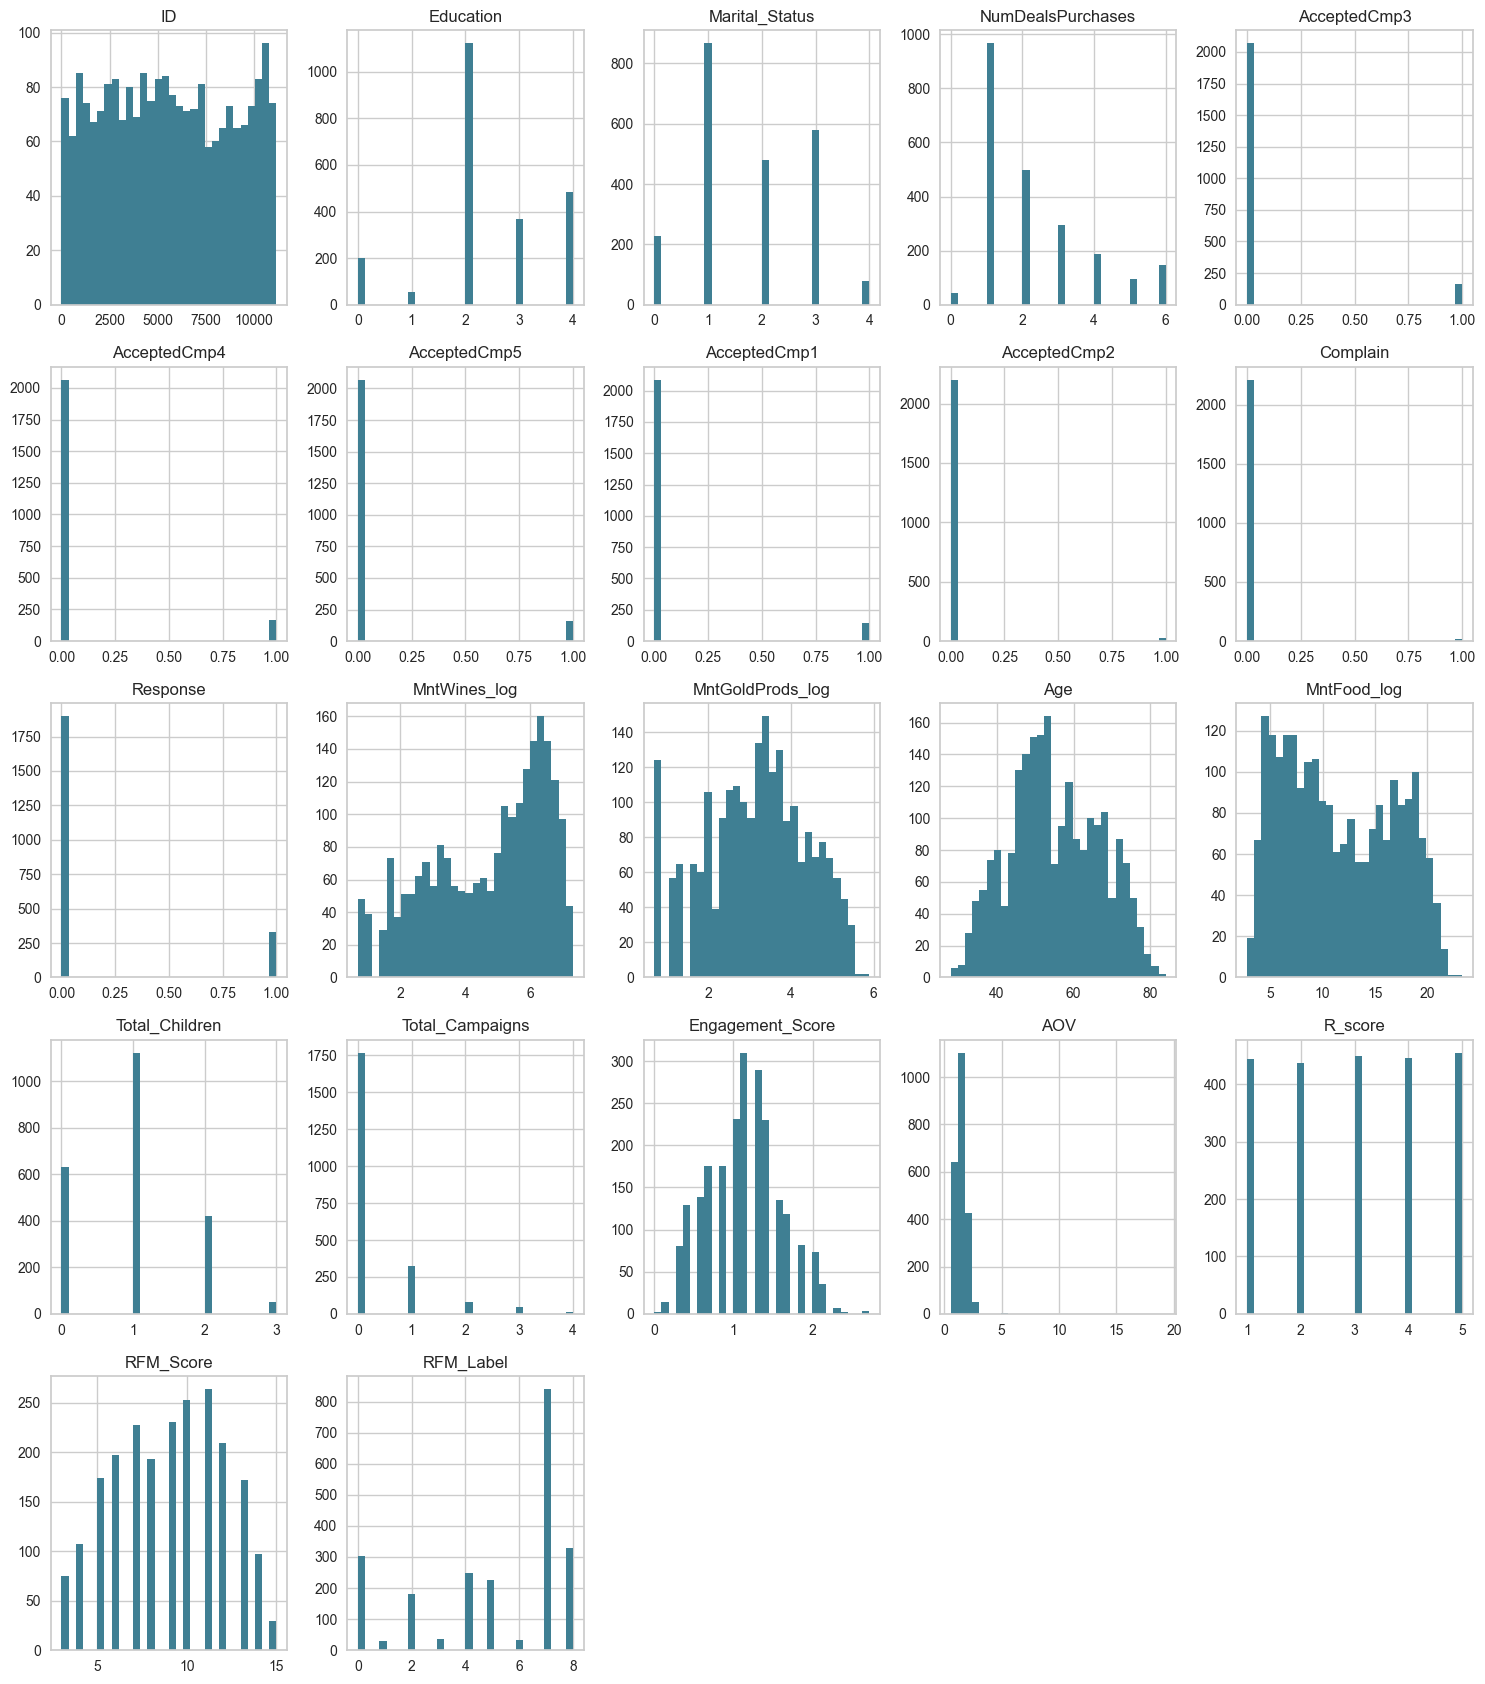

In [10]:
# Plot the distribution of each variable

X.hist(figsize=(15, 17), bins=30, color=color1)
plt.tight_layout()
plt.show()

In [11]:
# Normal Distribution -> Features that are approximately normally distributed can be scaled using StandardScaler
# Skewed Distribution -> For features that are heavily skewed, a Log Transformation can be applied before scaling, or MinMaxScaler can be used to normalize the values to a specific range
# Binary Features -> Features that are binary do not require scaling
# Multimodal Distribution -> Features with multiple peaks might benefit from trobust scaling techniques

# Define lists for StandardScaler and MinMaxScaler based on visual inspection
standard_scaling_features = ['NumDealsPurchases', 'MntWines_log', 'MntGoldProds_log', 'MntFood_log']
minmax_scaling_features = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Children', 'Total_Campaigns', 'Engagement_Score', 'AOV', 'R_score', 'RFM_Score', 'RFM_Label']

In [12]:
# Apply Standard Scaling

scaler_standard = StandardScaler()
X = X.copy()
X[standard_scaling_features] = scaler_standard.fit_transform(X[standard_scaling_features])

In [13]:
# Apply MinMax Scaling

scaler_minmax = MinMaxScaler()
X[minmax_scaling_features] = scaler_minmax.fit_transform(X[minmax_scaling_features])

In [14]:
X.head()

,ID,Education,Marital_Status,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,...,MntGoldProds_log,Age,MntFood_log,Total_Children,Total_Campaigns,Engagement_Score,AOV,R_score,RFM_Score,RFM_Label
0,0,0.50,0.25,-0.793909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.688513,0.196429,1.379447,0.000000,0.00,0.105263,0.058889,0.25,0.583333,0.250
1,1,0.50,0.50,-0.793909,0.0,0.0,0.0,0.0,1.0,0.0,...,0.386373,0.625000,-0.534509,0.000000,0.25,0.421053,0.025179,1.00,0.750000,1.000
2,9,0.75,0.50,1.157322,0.0,0.0,0.0,0.0,0.0,0.0,...,0.364581,0.375000,-1.171508,0.666667,0.00,0.631579,0.033752,0.00,0.166667,0.000
3,13,1.00,1.00,-0.143499,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.790620,0.875000,-1.466439,0.333333,0.00,0.421053,0.050907,0.50,0.166667,0.875
4,17,1.00,0.25,1.157322,0.0,0.0,0.0,0.0,0.0,0.0,...,0.963461,0.446429,0.645911,0.333333,0.00,0.473684,0.021084,0.00,0.583333,0.500


In [15]:
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,2230.0,5.585102e+03,3241.680707,0.000000,2826.750000,5453.500000,8417.500000,11191.000000
Education,2230.0,5.991031e-01,0.280676,0.000000,0.500000,0.500000,0.750000,1.000000
Marital_Status,2230.0,4.338565e-01,0.265180,0.000000,0.250000,0.500000,0.750000,1.000000
NumDealsPurchases,2230.0,1.011647e-16,1.000224,-1.444319,-0.793909,-0.143499,0.506912,2.458142
AcceptedCmp3,2230.0,7.309417e-02,0.260349,0.000000,0.000000,0.000000,0.000000,1.000000
AcceptedCmp4,2230.0,7.488789e-02,0.263269,0.000000,0.000000,0.000000,0.000000,1.000000
AcceptedCmp5,2230.0,7.264574e-02,0.259612,0.000000,0.000000,0.000000,0.000000,1.000000
AcceptedCmp1,2230.0,6.457399e-02,0.245828,0.000000,0.000000,0.000000,0.000000,1.000000
AcceptedCmp2,2230.0,1.345291e-02,0.115230,0.000000,0.000000,0.000000,0.000000,1.000000
Complain,2230.0,8.968610e-03,0.094298,0.000000,0.000000,0.000000,0.000000,1.000000


In [16]:
# Standard and MinMax Scaling methods have been applied appropriately to the respective features
# Note: It's fine to have negative values as this is a result of centering the data around the mean and scaling to unit variance

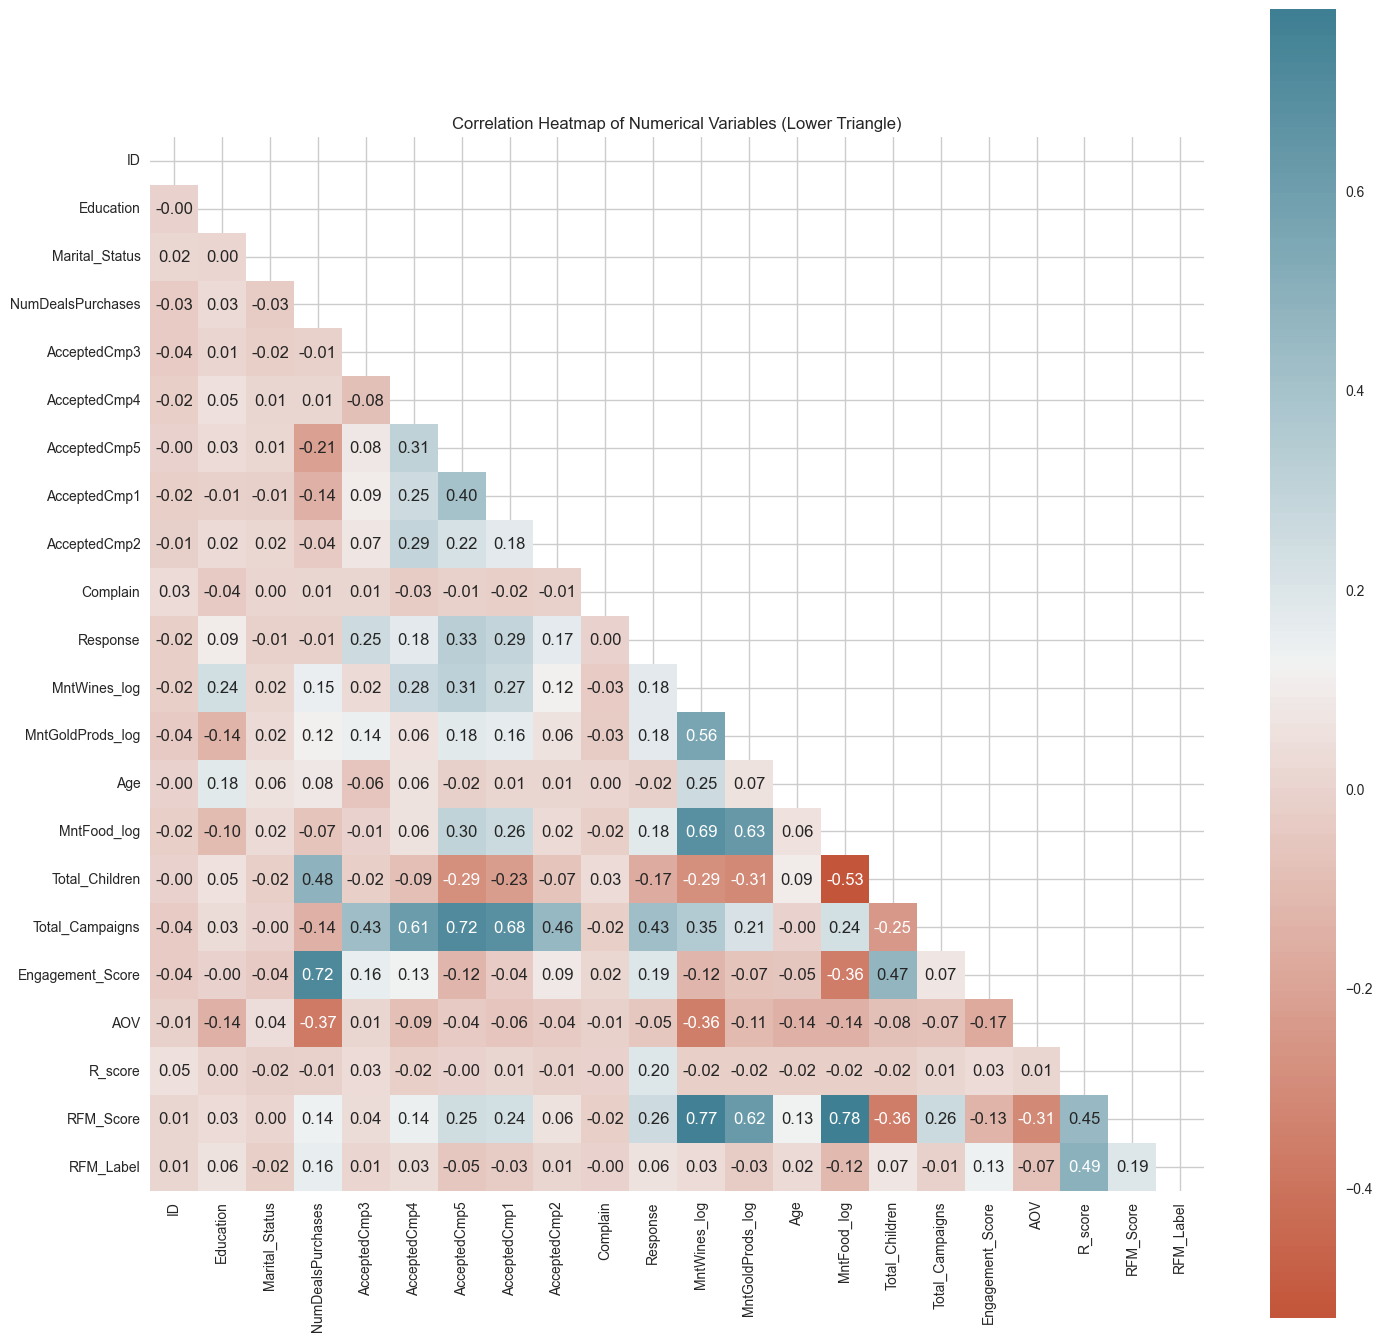

In [17]:
# Visualize the correlation matrix as a heatmap to easily identify relationships between numerical variables

# Select only the numerical columns
numerical_X = X.select_dtypes(include=['float64', 'int64', 'int32'])

# Compute the correlation matrix
corr_matrix = numerical_X.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

my_palette = sns.diverging_palette(20, 220, n=200)

# Create a heatmap
plt.figure(figsize=(17, 17))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=my_palette, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Variables (Lower Triangle)')
plt.show()

## Feature Selection

In [18]:
# Create the target
y = X['Response']

In [19]:
X = X.drop(columns=['Response'])

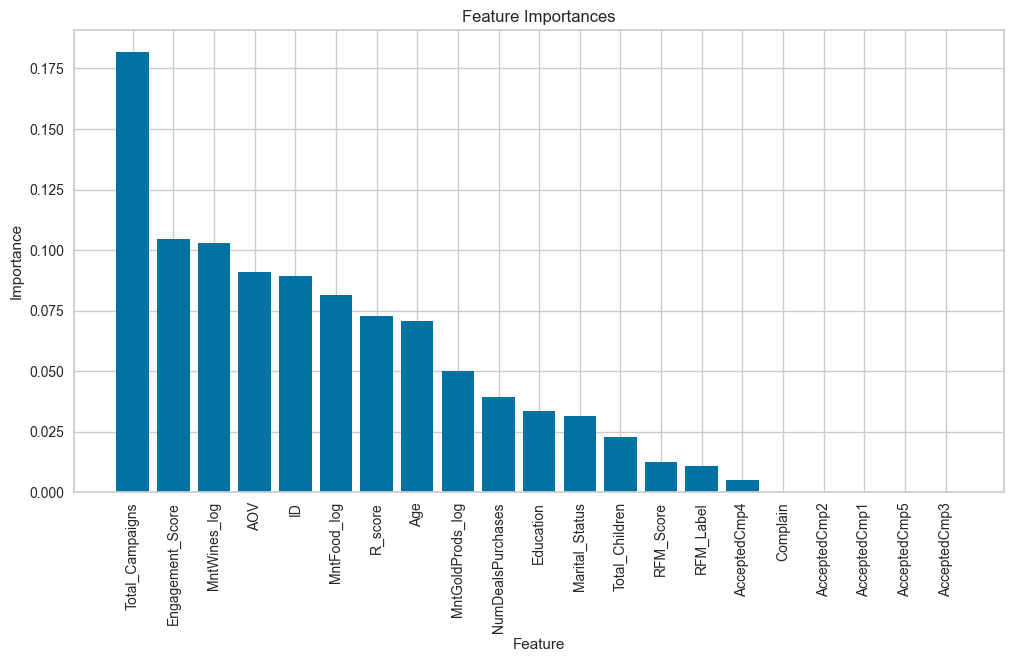

In [20]:
# Feature Selection using Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X, y)

# Get feature importances
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Review Feature Importances: Identify the top features based on their importance scores.
# Refine the Feature Set: Optionally, you can refine the feature set by selecting a subset of the most important features.

In [21]:
X = X.drop(columns=['ID'])

# Modeling

## Random Forest 

In [22]:
# Ensure X is a pandas DataFrame and y is a pandas Series or numpy array
X = pd.DataFrame(X)  # Convert to DataFrame
y = pd.Series(y)     # Convert to Series 

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

Counter({0.0: 1422, 1.0: 250})


<Axes: xlabel='Response', ylabel='count'>

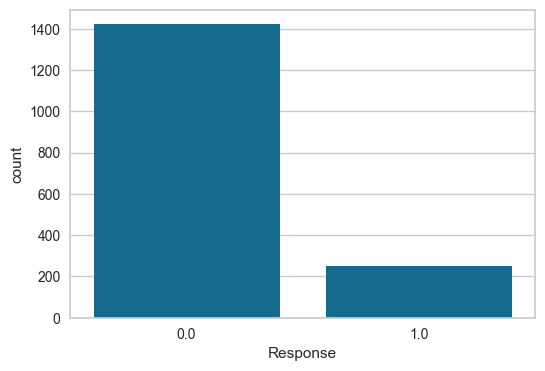

In [23]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)

Counter({0.0: 1422, 1.0: 1422})


<Axes: xlabel='Response', ylabel='count'>

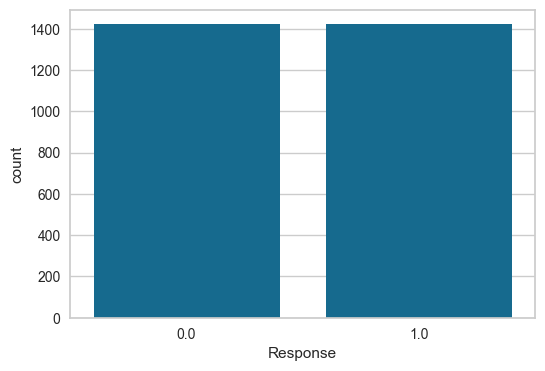

In [24]:
# Applyting SMOTE to generate new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train2}), ax=ax)

In [25]:
# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [26]:
# Select the top k features
k = 14
important_indices = np.argsort(importances)[-k:]

# Create new feature matrices with selected features
X_train_selected = X_train2.iloc[:, important_indices]
X_test_selected = X_test.iloc[:, important_indices]

# Verify the shapes of X_train_selected and y_train
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"y_train shape: {y_train2.shape}")

# Ensure that the selected features have the same number of rows as the original
assert X_train_selected.shape[0] == y_train2.shape[0], "Mismatch in number of rows between X_train_selected and y_train2"

# Train the new random forest model with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train2)

# Predict y for X_train and X_test
y_pred_test = rf_selected.predict(X_test_selected)
y_pred_train = rf_selected.predict(X_train_selected)

X_train_selected shape: (2844, 14)
y_train shape: (2844,)


In [27]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [28]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                         categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title) 

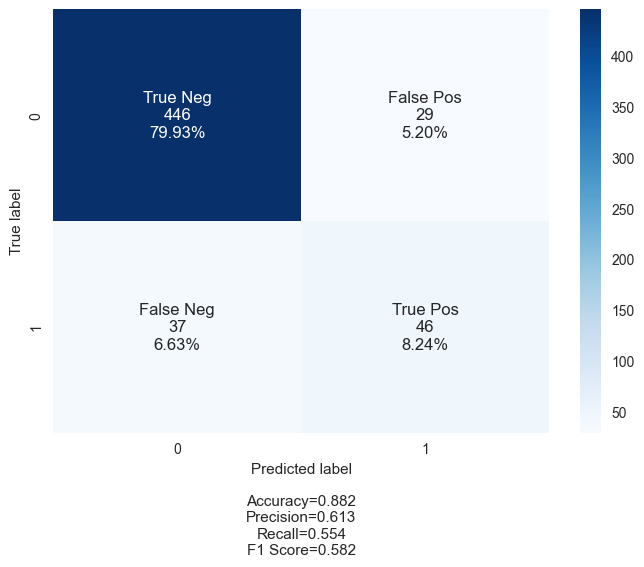

In [29]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

 - **High True Negative Rate**: The model is quite effective at correctly identifying customers who will not respond to the campaign, as evidenced by the high number of true negatives (446).
- **Moderate True Positive Rate**: The model correctly identifies a portion of the customers who will respond (46), but there is room for improvement.
- **False Positives and Negatives**: There are some false positives (29) and some false negatives (37), indicating that the model is making some errors in both directions.s.

In [30]:
resultsRF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsRF

,Measure,Train,Test
0,ACCURACY,1.0,0.881720
1,PRECISION,1.0,0.613333
2,RECALL,1.0,0.554217
3,F1 SCORE,1.0,0.582278
4,AUC,1.0,0.746582


 - The model performs perfectly on the training data, as indicated by all metrics being 1.0. However, it performs less effectively on the test data, particularly in precision and F1 score.
 - The accuracy on the test data is relatively high at 0.88, but the precision (0.613333) and recall (0.554217) are notably lower, leading to an F1 score of 0.582278. This suggests that the model is overfitting, as it has learned the training data too well but fails to generalize to new, unseen data.
 - The significant drop in precision indicates that the model incorrectly classifies many non-responders as responders, which could lead to inefficiencies in marketing efforts by targeting individuals who are unlikely to respond.
 - The lower recall also means the model misses a substantial number of actual responders, further reducing the effectiveness of the campaign."

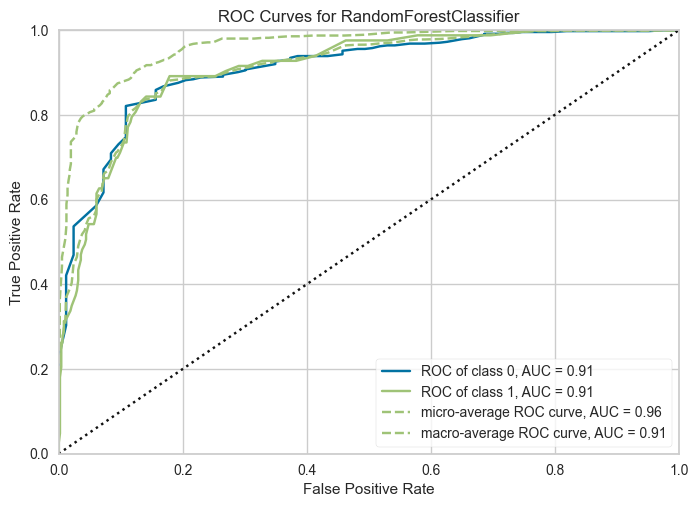

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [31]:
# ROC curve
visualizer = ROCAUC(rf, classes=['0','1'])
visualizer.fit(X_train_selected, y_train2)
visualizer.score(X_test, y_test)
visualizer.show()

- The ROC curves for the RandomForestClassifier indicate that the model performs well in distinguishing between the positive and negative classes for both class 0 and class 1, with an AUC of 0.91 for each class. The high AUC values signify that the model has a good balance of sensitivity and specificity.
- The micro-average ROC curve, with an AUC of 0.96, suggests an excellent overall performance when considering all classes together.
- The macro-average ROC curve, also with an AUC of 0.91, confirms the model's consistent performance across different classes.
- These results suggest that the RandomForestClassifier is effective at classifying both classes, although further evaluation with other metrics might be necessary to ensure comprehensive performance assessment."

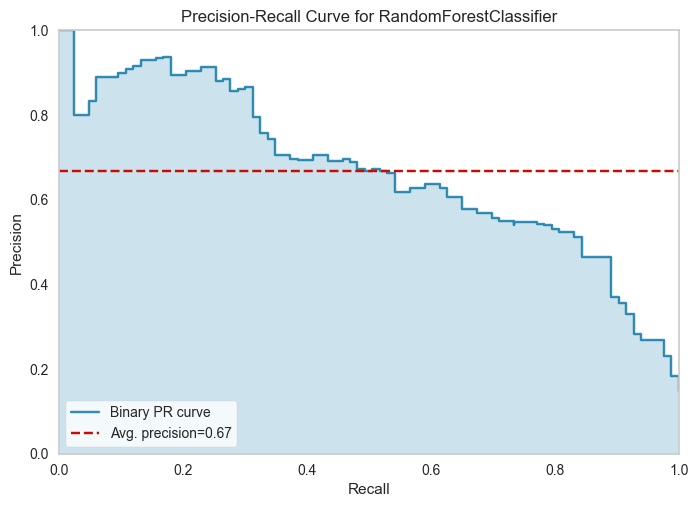

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [32]:
# Precison-Recall curve
from yellowbrick.classifier import PrecisionRecallCurve
visualizer = PrecisionRecallCurve(rf, classes=['0','1'])
visualizer.fit(X_train2, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

-  The Precision-Recall curve for the RandomForestClassifier shows how the precision and recall trade off with each other for different threshold settings.
-  The model achieves an average precision of 0.67, which is highlighted by the red dashed line.
-  The curve demonstrates that the model maintains high precision for lower recall values but precision drops significantly as recall increases. This indicates that while the model can accurately identify positive cases at lower thresholds, it tends to classify more false positives as it tries to capture more true positives.
-  The overall performance suggests that the model is moderately effective at balancing precision and recall, but there is room for improvement, especially if higher recall is desired without compromising precision excessively.